# Вступление

<div class="alert alert-info"> 
Компьютерная индустрия развивается все большими темпами. Необходимо на основе имеющихся данных проанализировать рынок компьютерных игр.

Объектом исследования являются данные по продажам игр в разных регионах мира. 

Предметом исследования - имеющиеся показатели, метрики и взаимосвязи в данных

Целями работы являются:

- провести исследовательский анализ данных
- составить портрет пользвателя каждого региона
- принять/не принять следующие гипотезы:
    - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
    - Средние пользовательские рейтинги жанров Action и Sports разные.

Исследование буду проводить с помощью статистического аппарата и языка программирования Python и встроенных библиотек.

</div>

In [3]:
import pandas as pd

In [4]:
from scipy import stats as st

In [5]:
import numpy as np

In [6]:
import matplotlib.pyplot as plt

## Шаг 1. Импорт и просмотр данных

Импортирую данные с помощью метода read_csv

In [7]:
games = pd.read_csv('/datasets/games.csv')

Посмотрю на первые 5 строк таблицы и пойму, что из себя представляют данные.

In [8]:
games.head(5)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Посмотрю информацию о данных, применив метод info()

In [9]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


<div class="alert alert-info"> Таким образом, в наших данных есть 16715 строк. Датафрейм состоит из 11 колонок. В некоторых из них присутствуют пропуски. 
    
Также присуствует два типа данных "object" и "float64". Есть столбец с годом релиза игры - вещественный тип данных. Нужно будет поменять на целочисленный.

Большое количество пропусков в столбе с оценкой критиков, оценкой пользователей и рейтингом игр. 
    
Также стоит отметить, что в отличие от оценки критиков, в столбец с оценкой пользователей имеет типа данных - object. 
    
Значит, там могут находиться не только цифры. Либо цифры, но которые перенеслись как строка.
    
В рейтинге есть как Nan, так и буквы, обозначающие рейтинг - соответственно, тип данных - object
    
</div>

## Шаг 2.

### Замена названий столбцов

In [10]:
games.columns = games.columns.str.lower() 

In [11]:
games.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### Обработка пропусков и замена типа данных

Всего строк в таблице 16715.
Пропусков в столбцах:

In [12]:
games.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [13]:
(games.isna().sum() / len(games)).round(4) * 100


name                0.01
platform            0.00
year_of_release     1.61
genre               0.01
na_sales            0.00
eu_sales            0.00
jp_sales            0.00
other_sales         0.00
critic_score       51.32
user_score         40.09
rating             40.48
dtype: float64

У двух игр не указано название и жанр, удалю данные позиции, тк как на результаты исследований это не повлияет

В 269 строках не указан год выпуска игры. Считаю, что заменять пропуски будет некорректно, тк как это может повлиять на результаты. Поэтому удалю их

Пропуски могли появиться из-за того, что пользователь не ввел год выпуска либо по причине того, что год релиза игры неопределен в принципе.

In [14]:
pd.options.mode.chained_assignment = None

In [15]:
for i in games[games['year_of_release'].isnull() == True].index:
    games['year_of_release'][i] = games.loc[games['name']== games['name'][i], 'year_of_release'].max()


In [16]:
(games.isna().sum() / len(games)).round(4) * 100

name                0.01
platform            0.00
year_of_release     0.87
genre               0.01
na_sales            0.00
eu_sales            0.00
jp_sales            0.00
other_sales         0.00
critic_score       51.32
user_score         40.09
rating             40.48
dtype: float64

In [17]:
games.dropna(subset=['name','year_of_release', 'genre'], inplace=True)

In [18]:
games.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8492
user_score         6633
rating             6699
dtype: int64

In [19]:
games.duplicated().sum()

0

<div class="alert alert-info"> 
явных дубликатов в данных нет
</div>

#### user_score

In [22]:
games['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

В данных есть пропуски и "tbd"-значение. Пропуски могли возникнуть:
- если пользователи не дали оценки
- при загрузке данных

"tbd" - Используется, если какая-то информация еще не определена или решение по вопросу не принято. 

Заменю данное значение на пропуск.


In [23]:
games['user_score'] = games['user_score'].replace('tbd', np.nan)

In [24]:
games['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

Теперь можно работать с пропусками.

Слишком много пропусков в данных, чтобы их удалять.

Выведу игры, у которых нет оценок пользователей.

In [25]:
games.query('user_score.isna()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


У более половины игр нет оценок пользователей.

Из нижней части таблице видно, что у игр, где нет оценок пользователей, продажи по регионам равны 0 млн копий.

Удалять такие данные некорректно, тк как копий продано может быть менее 10 тысяч - а это равно 0.00 млн.

У игр, которых было продано мало, отсутсвие значений можно объяснить тем, что пользователи просто не поставили оценки играм. Но у более популярных игр отсутсвие данных приводит к вопросам.

Поэтому заполню пропуски в `user_score` средним значением по жанру. 

In [26]:
games['user_score'] = pd.to_numeric(games['user_score'], errors='coerce')

Столбец `year_of_release` имеет тип `float`, заменю данных тип на `int`

In [28]:
games['year_of_release'] = games['year_of_release'].astype(int)

Рейтинг ставит определенная организация. поэтому пропуски заменю на "не определен". Здесь пропуски могли появиться по тех причине, либо организация действительно не поставила рейтинг для игры.

<div class="alert alert-info"> 
Стоит отметить, что рейтинговое агентство появилось в 1994 году. Следоватльно, до этого года нет рейтинга у игр.</div>

In [29]:
games['rating'] = games['rating'].fillna('Не определен')

Добавлю столбцец суммарных продаж для игр

In [30]:
#games['total_sales'] = games['na_sales'] + games['eu_sales'] +games['jp_sales']+games['other_sales']

In [31]:
games['total_sales'] = games[['na_sales', 'eu_sales', 'jp_sales','other_sales']].sum(axis=1)

## Шаг 3. Исследовательский анализ данных

### Количество выпускаемых игр в разные периоды

Сгруппирую данные по году и выведу количество игр, релиз которых был в определенный год

<AxesSubplot:xlabel='year_of_release'>

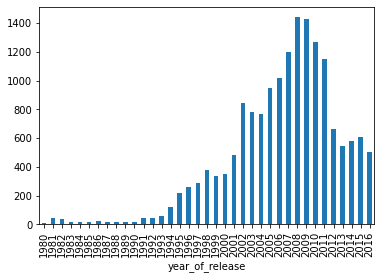

In [32]:
games.groupby('year_of_release')['name'].count().plot(kind='bar')

Думаю, для анализа данных часть игр, которые выпускались 1994 года не важна. Индустрия игр еще была не так популярна. Всего игр выпущенных до 1994 года составляет 365 штук. Это около 2% выборки.

На графике видно, что левый хвост гистограммы очень узок.

Рекордное количество игр было выпущено в 2008-09 годах.

In [33]:
games.query('year_of_release<1994')['name'].count()

365

### Анализ продаж по платформам

Создам список, где будут храниться названия всех платформ.

In [34]:
platforms = games['platform'].unique()

Далее для каждой платформы выведу график, как изменялись продажи игр по годам.

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
A

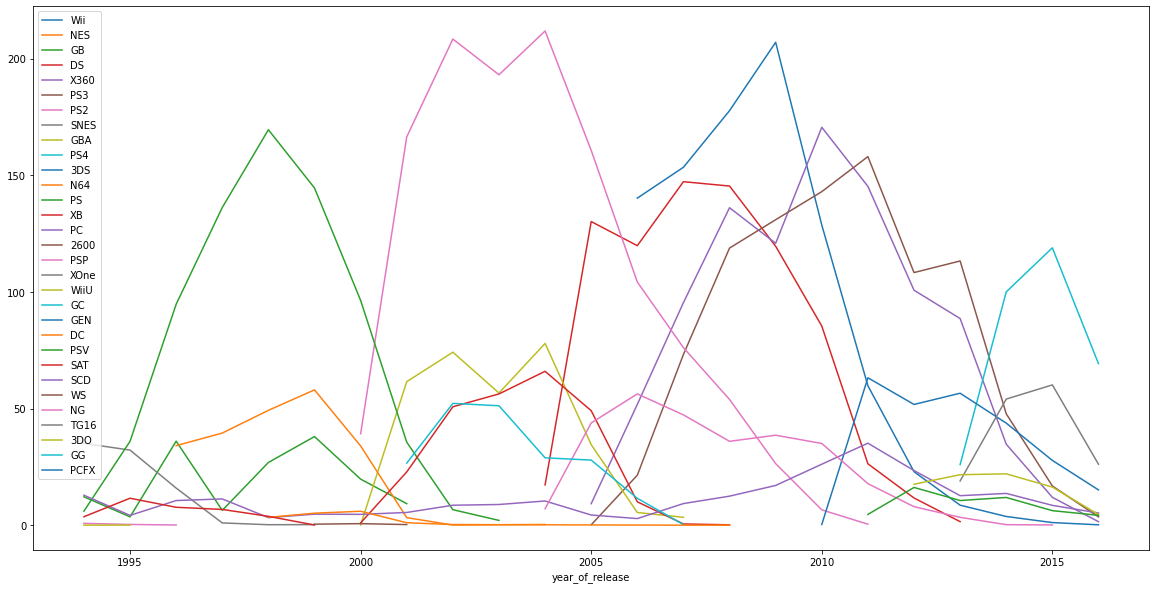

In [35]:

for pl in platforms:
    print(games.loc[(games['platform']==pl)&(games['year_of_release']>=1994)].groupby('year_of_release')['total_sales'].sum().plot(label=pl, legend=True, 
                                                                                                figsize=(20,10)))

В общем то смотреть все платформы одновременно очень неэффективно. Выберу платформы с наибольшими суммарными продажами c 1994 года и построю графики изменения продаж по годам.

Text(0, 0.5, 'Продажи')

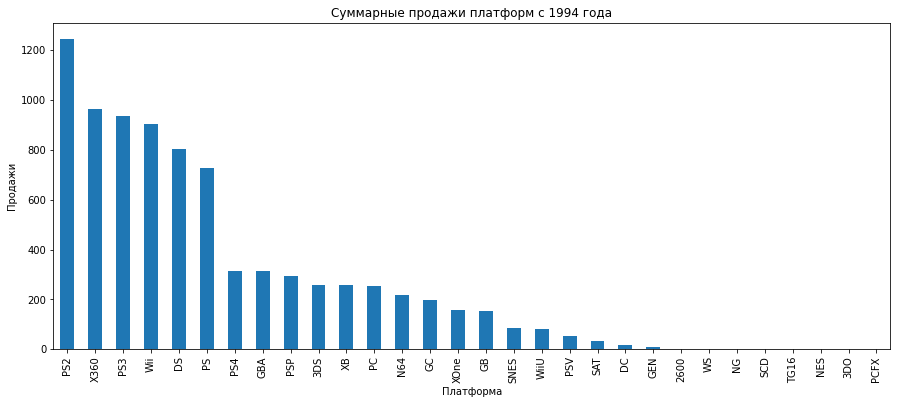

In [36]:
games.query('year_of_release>=1994').groupby('platform')['total_sales'].sum().sort_values(ascending=False).plot(kind='bar', 
                                                                                                                figsize=(15,6)
                                                                                                               )
plt.title('Суммарные продажи платформ с 1994 года')

plt.xlabel('Платформа')

plt.ylabel('Продажи', rotation=90)

<div class="alert alert-info"> 
Здесь видно, что лидеры за все время - это первые 6 платформ, поэтому для дальнейшего действия ( для определение пероида жизни платформы ограничусь шестью платформами.)</div>

In [37]:
platforms = games.groupby(['platform'])['total_sales'].sum().sort_values(ascending=False).head(6)

Далее сделаю списков названия топовых платформ

In [38]:
platforms = list(platforms.index.values)

In [39]:
platforms

['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']

Построю для них распределение продаж по годам.

Text(0, 0.5, 'Продажи')

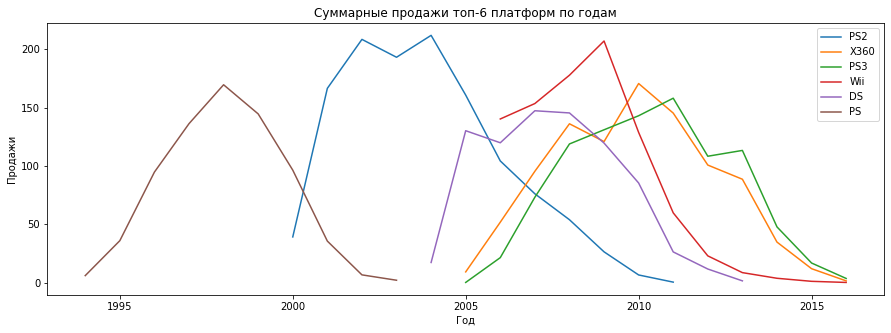

In [40]:
for pl in platforms:
    games.query('year_of_release>=1994 and platform==@pl').groupby('year_of_release')['total_sales'].sum().plot(legend=True, 
                                                                                                                label=pl, 
                                                                                                                figsize = (15,5))
plt.title('Суммарные продажи топ-6 платформ по годам')

plt.xlabel('Год')

plt.ylabel('Продажи')

На графике видно, сколько в целом живут самые популярные платформы. В целом у них жизненный цикл - 10 лет. Исключение составляет DS, очень долгое время данная платформа была в стадии "внедрения" (по ЖЦП), и только с 2005 года у нее начался рост. Примерно через каждые пять лет на рынок выхохит новая платформа. 

Стоит отметить, что странным кажется, что к 2016 году продажи всех игр стремяться к 0. Посмотрю на лидеров рынка за другой период

**Далее опледеляю актуальный период**

<div class="alert alert-info"> 
Как я указал ранне, лидирующие платформы занимают первые 6 позиций. PS опережает PS4 более чем в два раза. Платформы, после 6 места до 18 имеют примерно одинаковую популярность</div>

<div class="alert alert-info"> 
Но это данные с 1994 года ,стоит смотреть на распределение платформ в последние 3 года - такое условие поможет выявить популярные платформы на сегодняшний момент и отбросить не популярные</div>

Text(0, 0.5, 'Продажи')

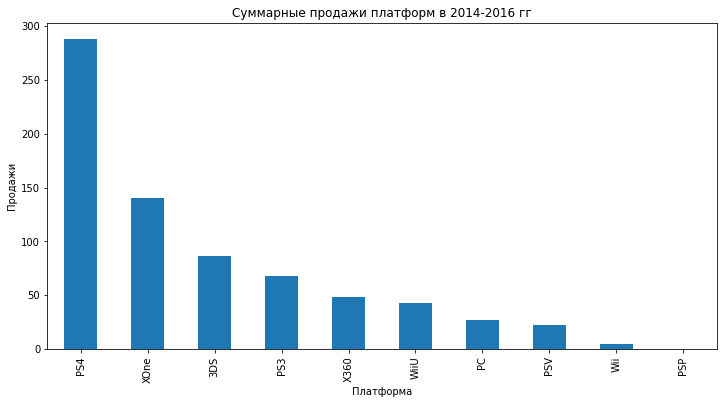

In [41]:
games.query('2014<=year_of_release<=2016').groupby('platform')['total_sales'].sum().sort_values(ascending=False).plot(kind='bar', 
                                                                                                                figsize=(12,6)
                                                                                                               )
plt.title('Суммарные продажи платформ в 2014-2016 гг')

plt.xlabel('Платформа')

plt.ylabel('Продажи', rotation=90)

<div class="alert alert-info"> 
Таким образом, PS2 вообще не находится в лидерах. Распределение платформ совсем иное.</div>

**Поэтому для дальнейшего исследования буду считать актуальным пириод - 2014-2016 годы**

<div class="alert alert-info"> 
 С учетом жизненного цикла платформ - на таком промежутке времени будут видны популярные и набирабщие популярность платформы.
</div>

In [42]:
games.query('2014<=year_of_release<=2016').groupby('platform')['total_sales'].sum().sort_values(ascending=False)

platform
PS4     288.15
XOne    140.36
3DS      86.68
PS3      68.18
X360     48.22
WiiU     42.98
PC       27.40
PSV      22.40
Wii       5.07
PSP       0.36
Name: total_sales, dtype: float64

<div class="alert alert-info"> 
Здесь уже в лидерах появилась ps4. Продажи данной платформы в разы превышают конкурентов. За 2014-2016 годы платформа PS4 продала 288 млн копий игр

Всего в последние три года на рынке 10 платформ. Ограничу выборку пятью самыми продаваемыми платформами</div>

In [43]:
platforms = games.query('2014<=year_of_release<=2016').groupby('platform')['total_sales'].sum().sort_values(ascending=False).head(5)

In [44]:
platforms = list(platforms.index.values)

Text(0, 0.5, 'Продажи')

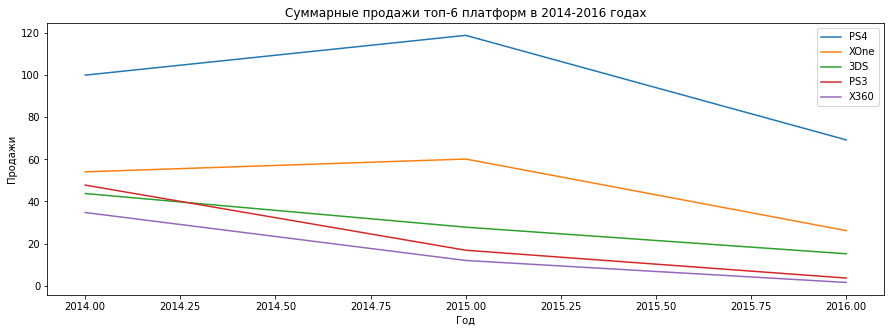

In [45]:
for pl in platforms:
    games.query('platform==@pl and 2014<=year_of_release<=2016').groupby('year_of_release')['total_sales'].sum().plot(legend=True, 
                                                                                                                      label=pl,
                                                                                                                     figsize=(15,5))

plt.title('Суммарные продажи топ-6 платформ в 2014-2016 годах')

plt.xlabel('Год')

plt.ylabel('Продажи')

<div class="alert alert-info"> 
Таким образом, вижу, что все популярные платформы к 2016 году снизили свои продажи по сравнению с 2015. Но стоит отметить, что 2016 год еще не закончен, перед новогодними праздниками ситуация может измениться. 
    
По-прежнему самая популярная платформа - PS4. Динамика движения XOne и PS4 схожа.
</div>

In [46]:
games.query('year_of_release==2016').groupby('platform')['name'].count().sort_values(ascending=False).head(5)

platform
PS4     164
XOne     87
PSV      85
PC       54
3DS      46
Name: name, dtype: int64

Также видим, что и игр, выпущенных на PS4 в 2016 г в разы больше по сравнению с остальными платформами. Следовательно, PS4 - это очень перспективная платформа, которую следует развивать. К тому же исходя из данных - жизненный цикл платформы составляет примерно 10 лет, а PS4 выпустилась только в 2013 года, что говорит о большом потенциале роста.

<div class="alert alert-info"> 

Топ-3 лидирующие платформы по продажам игр за последние три года - PS4, XOne, 3DS, а по количеству выпущенных игр PS4, XOne, PSV

По динамике продаж видно, что у PS4, XOne в 2015 году был пик продаж. У всех лидирующих платформ наблюдается спад продаж. Лидирующей по продажам остается PS4</div>

### «Ящик с усами» по глобальным продажам игр в разбивке по платформам

Построю боксплоты для каждой платформы по общим продажам на них (2014-2016гг).

<AxesSubplot:>

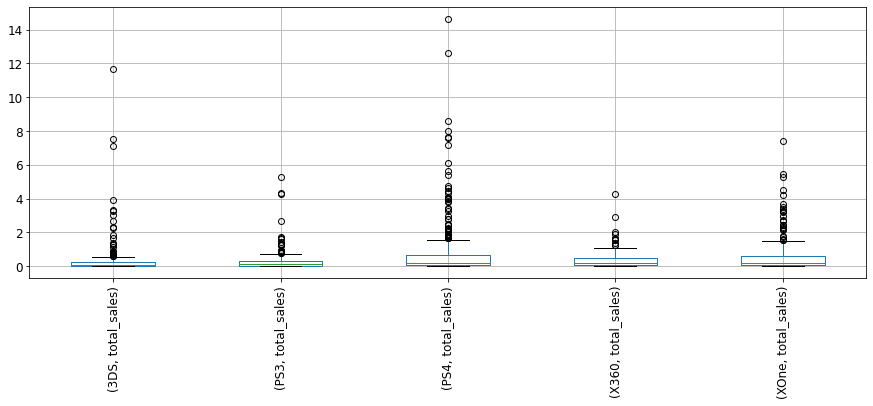

In [47]:
games.query('2014<=year_of_release<=2016 and platform in @platforms').groupby('platform').boxplot(column='total_sales',  subplots=False,rot=90, fontsize=12, figsize=(15,5))


<div class="alert alert-info">
построю боксплоты с уменьшенной шкалой "у"
</div>

(0.0, 2.0)

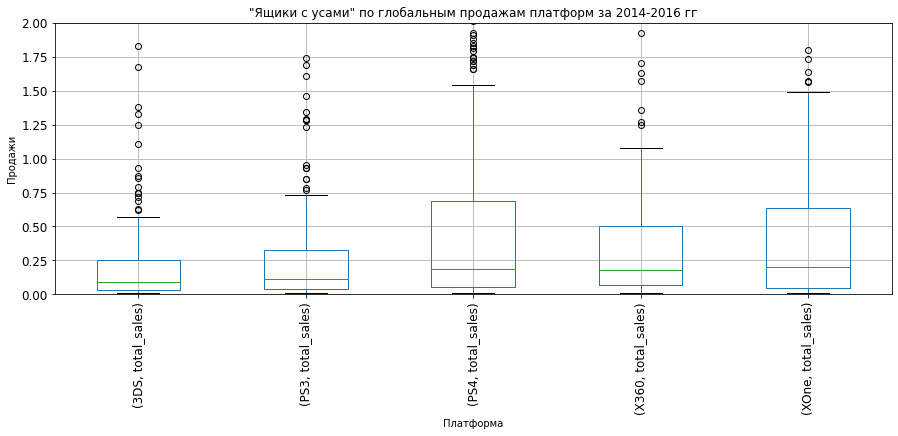

In [48]:
games.query('2014<=year_of_release<=2016 and platform in @platforms').groupby('platform').boxplot(column='total_sales',
                                                                       subplots=False,
                                                                       rot=90, 
                                                                       fontsize=12, 
                                                                       figsize=(15,5))

plt.title('"Ящики с усами" по глобальным продажам платформ за 2014-2016 гг')
plt.xlabel('Платформа')
plt.ylabel('Продажи')
plt.ylim(0,2)

<div class="alert alert-info"> На графике видно, что:

-  у платформ PS4, XOne, X360 медианы продаж находятся примерно на одном уровне. (половина всех игр на платформах за 2014-2016 имели продажи в ~200 тыс копий.

Болле того:

- PS4 и XOne схожи -  около 3/4 игр распродаются в количестве 700 тыс копий
- 3DS и PS3 схожи -  около 3/4 игр распродаются в количестве около 250 тыс копий

Но для этих платформ понимание игр-хитов различное:

- для PS4 и XOne игры, которые были проданы в количестве более1,5 млн копий - являются очень популярными.
- X360 - более ~1.05 млн копий
- 3DS - ~550 тыс копий
- PS3 - более 750 тыс копий

Также смещение квартилей, медиан может быть свидетельством общего количества игр, имеющихся у платформ </div>

(прошлый проект) Почти у всех платформ есть "выбросы" - игры, которые становились очень популярными. В целом у большей части таких игр продажи составляли до 20 млн копий. Но есть и исключения: так, у некоторых игр продажи составили до 40 млн копий, а у одной игры - 80 млн копий. Это рекордной значение за все время.

Платформы выпускают много игр, продажи которых выходят за рамки 1,5 межквартильных размаха

### Влияние отзывов пользователей и критиков на продажи платформы.

Возьму самую популярную платформу за все время - PS3.


<div class="alert alert-info">
Рассмотрю самую популярную на текущий момент платформу - PS4
</div>

#### Оценка пользователей - продажи и оценка критиков - продажи

Построю диаграмму рассеяния с помощью метода scatter, по оси х - отображу оценки пользователей по игре, по у - общие продажи данной игры

In [49]:
ps4 = games.query('2014<=year_of_release<=2016 and platform=="PS4"')

<AxesSubplot:xlabel='user_score', ylabel='total_sales'>

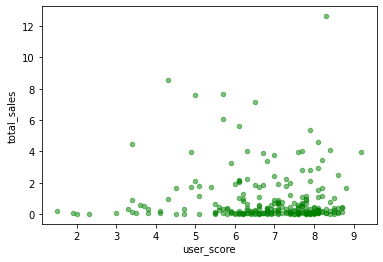

In [50]:
ps4.plot.scatter(x='user_score', y='total_sales', c='green', alpha=0.5)

Явного влияния оценки пользователей на продажи я не вижу. Стоит только сказать, что, действительно, зона, где оценка игр более 6 - намного насыщеннее и в этой зоне больше игр находится за рамками средних продаж.

In [51]:
ps4['user_score'].corr(ps4['total_sales'])

-0.040131589472697356

Аналогичные действия проведу с оценками критиков.

<AxesSubplot:xlabel='critic_score', ylabel='total_sales'>

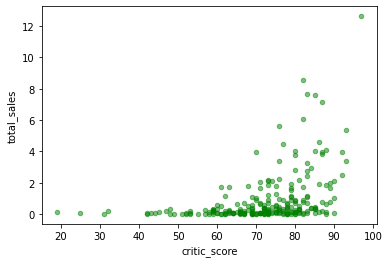

In [52]:
ps4.plot.scatter(x='critic_score', y='total_sales', c='green', alpha=0.5)

In [53]:
ps4['critic_score'].corr(ps4['total_sales'])

0.40266141068104083

ТАким образом, на платформе PS4 оценки пользователей не влияет на продажи игр. Пользователи скорее следят за мнением критиков и принимают решения, покупать игру игру или нет.

ОЦенка критиков более весомая и она в большей степени влияет на продажи игр. Сгруппировав данные по оценке критиков, я получил датафрейм, в котором отражается сколько игр было продано с определенной оценкой.

На последнем графике уже видна закономерность, что от оценки в 60 баллов - чем больше оценка критика - тем больше игр продается.

Кф корреляции равен 0,42, что показывается наличие влияния, но показатель мал, чтобы говорить, что связь сильная.

**Посмотрю кф корреляции между параметрами на других платформах (топ-5)**

Напишу функцию, которая принимает датафрейм и выводит кф корреляции и графики для каждой платформы. (криво, но постарался))

In [65]:
def graphs(data):
    for pl in platforms:
        if pl!="PS4":
            print(pl)
            print('Коэффициент корреляции между оценкой пользователей и продажами: ', data.query('2014<=year_of_release<=2016 and platform==@pl')['user_score'].corr(data.query('2014<=year_of_release<=2016 and platform==@pl')['total_sales']).round(2))
            print('Коэффициент корреляции между оценкой критиков и продажами: ', data.query('2014<=year_of_release<=2016 and platform==@pl')['critic_score'].corr(data.query('2014<=year_of_release<=2016 and platform==@pl')['total_sales']).round(2))
            fig = plt.figure(figsize=(15, 5))
            
            ax1=fig.add_subplot(1,2,1)
            ax2=fig.add_subplot(1,2,2)
            ax1.set(title='user-sales')
            ax2.set(title='critic-sales')
            pl_user = data.query('2014<=year_of_release<=2016 and platform==@pl').groupby('user_score')['total_sales'].sum()
            pl_user = pl_user.to_frame()
            pl_user.reset_index(inplace=True)
            pl_critic = data.query('2014<=year_of_release<=2016 and platform==@pl').groupby('critic_score')['total_sales'].sum()
            pl_critic = pl_critic.to_frame()
            pl_critic.reset_index(inplace=True)
            ax1.scatter(pl_user['user_score'], pl_user['total_sales'])
            ax2.scatter(pl_critic['critic_score'], pl_critic['total_sales'])
            plt.show()
        else:
            continue

XOne
Коэффициент корреляции между оценкой пользователей и продажами:  -0.07
Коэффициент корреляции между оценкой критиков и продажами:  0.43


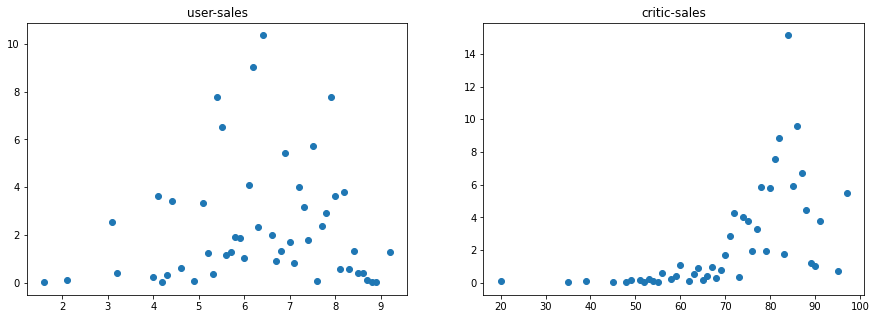

3DS
Коэффициент корреляции между оценкой пользователей и продажами:  0.22
Коэффициент корреляции между оценкой критиков и продажами:  0.31


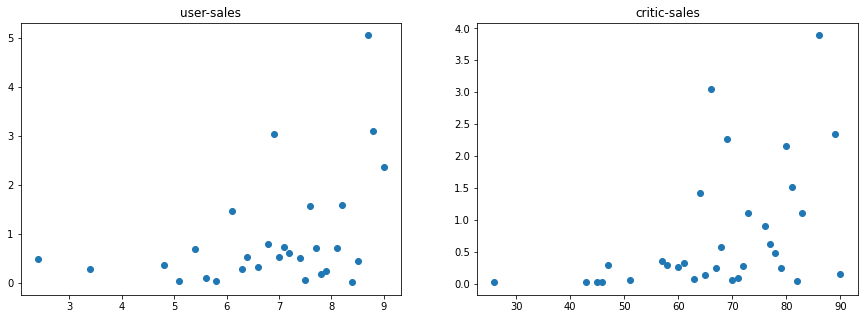

PS3
Коэффициент корреляции между оценкой пользователей и продажами:  -0.17
Коэффициент корреляции между оценкой критиков и продажами:  0.45


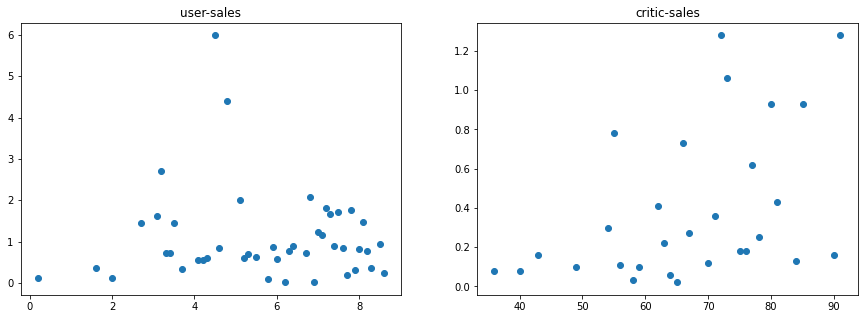

X360
Коэффициент корреляции между оценкой пользователей и продажами:  -0.14
Коэффициент корреляции между оценкой критиков и продажами:  0.53


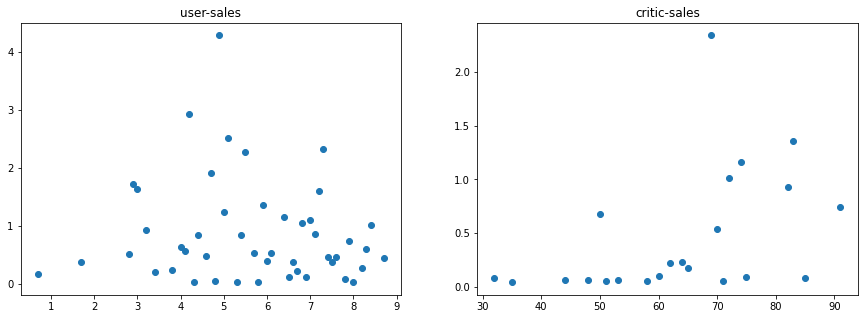

In [66]:
graphs(games)

<div class="alert alert-info">
Оценки пользователей не влияют на продажи игр. А вот оценки критиков влияют. Пользователи прислушиваются к их мнению и принимают решение о покупке. 

У показателя критик-продажи - кф корреляции выше 0,4 (кроме 3DS), что показывает наличие связи и это более явно демострируют графики.

Наибольший кф корреляции (0,53) наблюдается на платформе X360. </div>

### Распеределение игр по жанрам.

<AxesSubplot:xlabel='genre'>

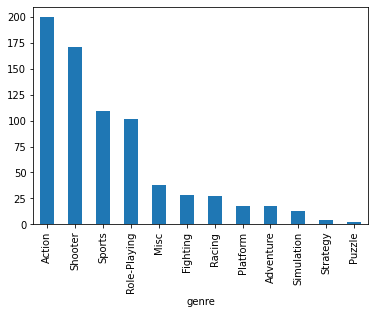

In [67]:
games.query('2014<=year_of_release<=2016').groupby('genre')['total_sales'].sum().sort_values(ascending=False).plot(kind='bar')

Самые популярные жанры - это Action, Shooter. 
Самый непопулярный жанр - Puzzle

<div class="alert alert-info">

Вероятно экшн игры рпивлекают своей реалистичностью, игроки погружаются в игру и они испытывают ощущение реальности. Развивают своих игроков и тд. Также экшн игры более дорогие по своей разработке, поэтому, возможно, больше средств уходит и на маркетинг, что привлекает большое количество пользователей</div>

(0.0, 4.0)

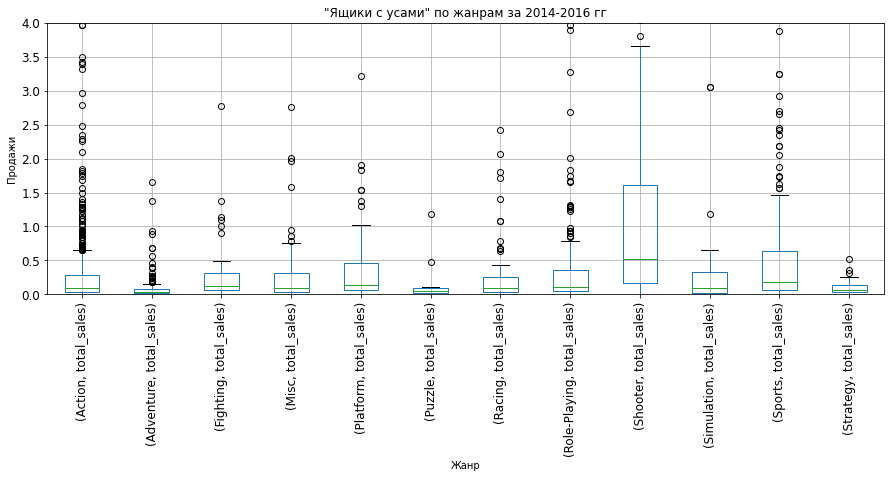

In [68]:
games.query('2014<=year_of_release<=2016').groupby('genre').boxplot(column='total_sales',
                                                                       subplots=False,
                                                                       rot=90, 
                                                                       fontsize=12, 
                                                                       figsize=(15,5))

plt.title('"Ящики с усами" по жанрам за 2014-2016 гг')
plt.xlabel('Жанр')
plt.ylabel('Продажи')
plt.ylim(0,4)

In [69]:
games.query('2014<=year_of_release<=2016 and genre=="Action"')['total_sales'].agg(['mean', 'median'])

mean      0.322113
median    0.090000
Name: total_sales, dtype: float64

In [70]:
games.query('2014<=year_of_release<=2016 and genre=="Shooter"')['total_sales'].agg(['mean', 'median'])

mean      1.335469
median    0.515000
Name: total_sales, dtype: float64

<div class="alert alert-info">
Среднее очень сильно отличается от медианного значения - значит, есть игры, которые продавались большим тиражом и стали очень популярные, не смотря на то, что половина игр жанра экшн была продажа в количестве по 100 тыс копий

у шутеров разница между средним и медианой не такая большая как у экшн игр, но все же почти в три раза среднее больше медианы.

Значит, так же есть игры, которые стали очень популярные и продались в большом количестве.</div>

<div class="alert alert-info">
Из боксплотов можно сделать такие выводы:
    
Распределение выпускаемых игр по жанрам отличается между собой.
    
Например, видна разница между шутерами и экшн играми:
    
У шутеров 75% игр в этом жанре были проданы в размере 1,6 млн копий
В то время как у экшн игр 75% игр лежит в диапазоне продаж до ~300 тыс копий.
Но не смотря на это экшн - самый продаваемый жанр. 
    
Также стоит посмотреть на количество игр в жанре

</div>

In [71]:
games.query('2014<=year_of_release<=2016 and genre=="Action"')['genre'].agg(['count'])

count    620
Name: genre, dtype: int64

In [72]:
games.query('2014<=year_of_release<=2016 and genre=="Shooter"')['genre'].agg(['count'])

count    128
Name: genre, dtype: int64

<div class="alert alert-info">
За 2014-2016 годы жкшн игр было выпущено 620 штук, в то время как шутеров - 128. Почти в 5 раз меньше.
    
Но из столбчатой диаграммы видно, что шутеры и экшн игры по продаваемости находятся рядом.
    
Значит, шутеры при их небольшом количестве продавались намного эффетивнее. При 128 шт игр - продажи сходи с экшн.
    
Наиболее прибыльные игры - это шутеры. Они становятся очень популярные
</div>

### Вывод

- с 1994 года количество выпускаемых игр стало стремительно расти
- В 2007-2008 годах был достигнут пик продаж игр на приставки
- Жизненный цикл платформы составляет 10 лет, через каждые пять лет на рынок выхохит новая платформа
- Пользователи при покупке игр берут во внимание оценки критиков, что влияет на продажи.
- Наиболее популярный жанр - action, но наиболее прибыльный (количество-продажи) shooter. При небольшом количестве игр - продажи схожи с экшн играми.
- Наименее популярный жанр - puzzle


## Портрет пользователя каждого региона

### Самые популярные платформы (топ-5) в регионах, cамые популярные жанры (топ-5), рейтинг ESRB

In [73]:
regions=['na_sales', 'eu_sales', 'jp_sales']

In [74]:
def pop_pl(data):
    for i in regions:
        print(i)
        fig = plt.figure(figsize=(15, 3))
        ax1=fig.add_subplot(1,3,1)
        ax2=fig.add_subplot(1,3,2)
        ax3=fig.add_subplot(1,3,3)
        ax1.set(title='pop_pl')
        ax2.set(title='pop_genres')
        ax3.set(title='pop_rating')
        plat = data.query('2014<=year_of_release<=2016').groupby('platform')[i].sum().sort_values(ascending=False).head(5)
        plat = plat.to_frame()
        plat.reset_index(inplace=True)
        genres = data.query('2014<=year_of_release<=2016').groupby('genre')[i].sum().sort_values(ascending=False).head(5)
        genres= genres.to_frame()
        genres.reset_index(inplace=True)
        rating =data.query('2014<=year_of_release<=2016').groupby('rating')[i].sum().sort_values(ascending=False).head(5)
        rating = rating.to_frame()
        rating.reset_index(inplace=True)
        ax1.bar(plat['platform'], plat[i], color = 'green')
        ax2.bar(genres['genre'], genres[i], color = 'blue')
        ax3.bar(rating['rating'], rating[i], color = 'pink')
        plt.show()

na_sales


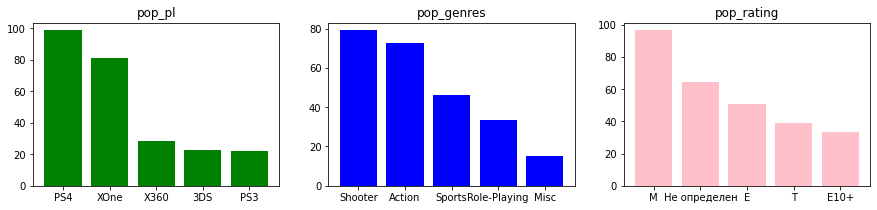

eu_sales


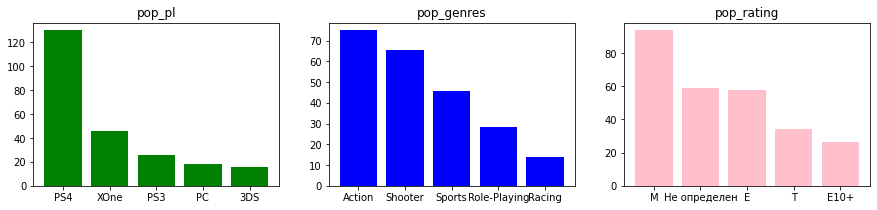

jp_sales


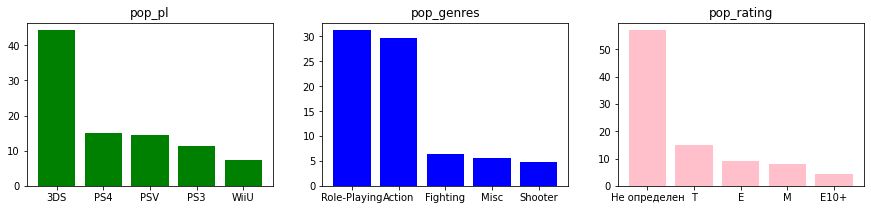

In [75]:
pop_pl(games)

<div class="alert alert-info"> Посмотрю для каждого региона долю присуствия топ-5 платформ.
</div>

In [76]:
na_sales_pl = games.query('2014<=year_of_release<=2016').groupby('platform')['na_sales'].sum().to_frame()

In [77]:
na_sales_pl['percent']=((na_sales_pl['na_sales']/games.query('2014<=year_of_release<=2016')['na_sales'].sum())*100).round(2)

In [78]:
na_sales_pl.sort_values(by='percent', ascending=False).head(5)

,na_sales,percent
platform,,
PS4,98.61,34.71
XOne,81.27,28.60
X360,28.30,9.96
3DS,22.64,7.97
PS3,22.05,7.76


<div class="alert alert-info">
PS4 занимает ~35% рынка платформ в Америке, второе место занимает XOne</div>

In [79]:
eu_sales_pl = games.query('2014<=year_of_release<=2016').groupby('platform')['eu_sales'].sum().to_frame()

In [80]:
eu_sales_pl['percent']=((eu_sales_pl['eu_sales']/games.query('2014<=year_of_release<=2016')['eu_sales'].sum())*100).round(2)

In [81]:
eu_sales_pl.sort_values(by='percent', ascending=False).head(5)

,eu_sales,percent
platform,,
PS4,130.04,48.00
XOne,46.25,17.07
PS3,25.54,9.43
PC,18.22,6.72
3DS,16.12,5.95


<div class="alert alert-info">
Доля рынка PS4 в Европе в три раза превышает XOne. 
</div>

In [82]:
jp_sales_pl = games.query('2014<=year_of_release<=2016').groupby('platform')['jp_sales'].sum().to_frame()

In [83]:
jp_sales_pl['percent']=((jp_sales_pl['jp_sales']/games.query('2014<=year_of_release<=2016')['jp_sales'].sum())*100).round(2)

In [84]:
jp_sales_pl.sort_values(by='percent', ascending=False).head(5)

,jp_sales,percent
platform,,
3DS,44.24,47.52
PS4,15.02,16.13
PSV,14.54,15.62
PS3,11.22,12.05
WiiU,7.31,7.85


<div class="alert alert-info">
В Японии самой популярной платформой является 3DS, ее доля рынка почти 50%
</div>

#### Платформы

<div class="alert alert-info">
<b> вывод</b> Таким образом, в Америке наиболее популярны PS4 и XOne. ПРимерно одинаковую популярность занимают X360 ,3DS, PS3
    
В Европе же лидирующие позиции ханимают PS4, XOne. (причем у PS4 продажи в 3 раза больше чем у XOne) Также в топ входят PS3, PC И 3DS. 
    
Ситуация в Японии отличается от Америки и Европы.

Платформа 3DS лидирует.(ее продажи более чем в 2 раза превышают вторую по популярности платформу PS4). PS4, PSV и PS3 примерно одинаковы по популярности. 
    
Также в топ входит WiiU, которая не наблюдалась в лидерах в Америке и в Европе.

Получается, предпочтения японцев в выборе платформ отличаются от американцев и европейцев.
    
Такое различие может говорить об оринетации платформ на разные рынки. Ведь PS4 выпустилась в 2013 году и ее продажи начались в США, Европе, Южной Америке, России и Австралии, и только в 2014 году в Японии.
    
А вот 3DS - поступила в продажу в Японии 2011 года и только потом в США
</div>

В Америке X360 и PS2 - две наиболее популярные платформы. Также в топ входят Wii, PS3 И DS.

В Европе же лидирубщие позиции ханимают PS2, PS3. Также в топ входят X360, Wii И PS.

Платформа DS не в ходит топ-5 в отличие от Америке.

Ситуация в Японии кардинально отличается от Америки и Европы. 

Платформа DS лидирует. PS и PS2 одинаковы по поулярности. Также В топ входят две платформы, которые не были в лидерах в Америке и в Европе - SNES и 3DS.

То есть можно сделать вывод, что предпочтения японцев в выборе платформ отличаются от Америки и Европы.

#### Жанры

<div class="alert alert-info">
<b>
    вывод</b> В Америке лидируют шутеры, затем идут экшн игры, спорт, ролевые и микс
    
В Европе первое место занимают экшн игры, потом идут шутеры, спорт, ролевые и, в отличие от Америки, гонки (racing).
    
В Америке и Европе портреты потребителей по жанрам примерно схожи, чего нельзя сказать о Японии.
    
В лидерах здесь ролевые игры и экшн. Бои, микс и шутеры в разы менее популярны.
</div>

В целом жанровые предпочтения в Америке и Европе идентичны. Action- самый популярный жанр в данных регионах.

А вот в Японии с большим отрывом лидируют ролевые игры на пк. Причем продажи по данному жанру более чем в 2 раза превышают след по популярности жанр - action. Остальные 4 жанры совпадают с Америкой.

#### Влияние рейтинга на продажи

<div class="alert alert-info">
Америка и Европа схожи по свои предпочтениям в рейтинге игр. Так Распределение игр по рейтингу примерно идентичное. 
Лидируют игры с рейтингом М - для взрослых. Второе место занимают игры без рейтинга.

В Японии ситуация кардинально отличается, там безоговорочным фаворитом являются игры без рейтинга.

Стоит сказать, что ESRB - это огранизация, целевая задача которой - определять рейтинги игр для США и Канады. Что объясняет высокий показатель игр без рейтинга в Японии.

Помимо этого, ESRB выставляет рейтинг офлайн-играм. В онлайн-играх, содержимое которых может модифицироваться пользователями, используется замечание «Game Experience May Change During Online Play», которое предупреждает покупателей о том, что пользовательский контент в игре не проходил рецензирования ESRB.

Таким образом, игры без рейтинга могут служить ориентиром, что игра была выпущена для японской аудитории, либо она является онлайн-игрой.</div>

Весомая часть игр составлют игры с неизвестным рейтингом. Это никакой информации при интерпретации данных не даст, поэтому построю графики только с указанными рейтингами.

В целом в данных регионах распределение рейтингов схоже.


Лидируют игры с рейтингом Е - это «E» («Everyone») — «Для всех»: Содержание вполне подходит для всех возрастов. Такие игры могут понравиться и взрослым. Игры с этим рейтингом могут содержать минимальное насилие, в основном «мультяшного» характера.

В Европе и Америке игры Т и М почти одинаковы по популярности, а вот в Японии игры-Т - намного популярнее игр М.


### Вывод

**Портрет пользователя - Америка**:

Самые популярные платформы:
- PS4, XOne (34%и 28% рынка)

Самые популярный жанр:
- Shooter, Action

Три самые популярные рейтинга:
- М(«Для взрослых»), без рейтинга (возможно, это онлайн-игры), Е (для всех)

**Портрет пользователя - Европа**:

Самая популярная платформа:
- PS4 (48% рынка)

Самые популярный жанр:

- Action, Shooter

Три самые популярные рейтинга:
- М(«Для взрослых»), без рейтинга (возможно, это онлайн-игры), Е (для всех)

**Портрет пользователя - Япония**:

Самые популярная платформа:
- 3DS (47% рынка)

Самые популярные жанры:

- Role-Playing, Action

Три самые популярные рейтинга:
- Е (Для всех»), Т(«Подросткам»), М(«Для взрослых»)

## Проверка гипотез

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

<div class="alert alert-info">
Ho = средние пользовательские рейтинги платформ Xbox One и PC одинаковые (Xср=Yср)
    
H1 = средние пользовательские рейтинги платформ Xbox One и PC не равны друг другу (Xср не равен Yср)
    
Критическая область будет двухсторонней
</div>


In [85]:
alpha=0.05

Чтобы сравнивать средние двух выборок необходимо, чтобы средние их выборок были нормально распределены вокруг среднего ген совокупности.

Предположим, что это условие выполняется.

In [86]:
results = st.ttest_ind(games.query('2014<=year_of_release<=2016 and platform=="XOne" and user_score.isna() == False')['user_score'], 
                       games.query('2014<=year_of_release<=2016 and platform=="PC" and user_score.isna() == False')['user_score'])

In [87]:
print('p-значение:', results.pvalue)

p-значение: 0.1269024252036148


In [88]:
if results.pvalue<alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

Не получилось отвергнуть нулевую гипотезу


<div class="alert alert-info">

pvalue (12%) больше уровня значимости (5%). Это означает, что вероятность получить одинаковые средние из двух выборок весома.

в 12 из 100 случаев можем получить одинаковые средние для пользовательских рейтингов у данных платформ.

Поэтому на имеющихся данных, на уровне значимости 5% (уровне доверия 95%) нет оснований отвергнуть
нулевую гипотезу
    
</div>

In [89]:
games.query('2014<=year_of_release<=2016 and platform=="XOne" and user_score.isna() == False')['user_score'].mean()

6.594545454545456

In [90]:
games.query('2014<=year_of_release<=2016 and platform=="PC" and user_score.isna() == False')['user_score'].mean()

6.316260162601626

<div class="alert alert-info">
Если проверить средние данных выборок, то, действительно, средние значение пользовательских оценок очень близки между собой. 

Поэтому мправедливо не отвергать нулевую гипотезу
</div

### Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

<div class="alert alert-info">
    
    Попытка номер 3))
Ho = средние пользовательские рейтинги жанров Action и Sports одинаковые(Xср = Yср)
    
H1 = средние пользовательские рейтинги жанров Action и Sports разные (Xср не равен Yср)
    

</div>


In [92]:
alpha=0.05

In [93]:
results = st.ttest_ind(games.query( '2014<=year_of_release<=2016 and genre=="Action" and user_score.isna() == False')['user_score'], 
                       games.query( '2014<=year_of_release<=2016 and genre=="Sports" and user_score.isna() == False')['user_score'])

In [94]:
print('p-значение:', results.pvalue)

p-значение: 2.1177739029231719e-19


In [95]:
if results.pvalue<alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

Отвергаем нулевую гипотезу


<div class="alert alert-info">

    
p-value в разы меньше уровня стат значимости (5%).
    
ТАким образом, при ~0 случаях из 100 мы можем получить одинаковые средние пользовательские рейтинги. Уровень стат значимости задан на уровне 5 случаев. Значит, при всех значениях, что меньше 5 - мы не принимаем первую гипотезу, и может принять гипотезу о том, что, действително, средние пользовательские рейтинги могут быть разными
   

</div>

In [96]:
games.query( '2014<=year_of_release<=2016 and genre=="Action" and user_score.isna() == False')['user_score'].mean()

6.766442953020134

In [97]:
games.query( '2014<=year_of_release<=2016 and genre=="Sports" and user_score.isna() == False')['user_score'].mean()

5.2251968503937

<div class="alert alert-info">
Даже если сравнить средние значения этих выборок, то они сильно отличаются (на 1.5 балла), поэтому есть основания предполагать что средние ген совокупности так же различны.</div>

вероятность получить значение за пределелами 0,05 крайне мала(вероятность того, что полученное среднее будет сильно отличаться от среднего выборки первой совокупности). Следовательно, много вероятно получить такое значение, которое будет близко к среднему первой совокупности.

Поэтому мы отвергли гипотезу о том, что средние рейтинги разные. Ведь даже если посмотреть на средние значения этих выборок, то они отличаются всего на 0,1 единицы, что является малой разницей между показателями.

In [98]:
games.query('genre=="Action"')['user_score'].mean()

7.0564835164835165

In [99]:
games.query('genre=="Sports"')['user_score'].mean()

6.956375227686704

## Шаг 6 Общий вывод

<div class="alert alert-info">
Таким образом, в ходе проекта были достигнуты следующие цели:

- проведен исследовательский анализ данных
- составлен портрет пользвателя каждого региона
- была проверена гипотеза "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые" 
- была проверена гипотеза "Средние пользовательские рейтинги жанров Action и Sports разные" 

Сделаны следующие выводы:
- бум выпуска игр пришелся на 2008-2009 годы, потом количество выпущенных игр с каждый годом стало уменьшаться
- на текущий момент самая популярная платформа - PS4. Ее популярность растет, она занимает болльшую часть рынка в Америке и Европе. и Вероятно, еще не достигла своего пика, тк в среднем пик достигается на 5 год существования платформы.
- Средний жизненный цикл платформы - 10 лет
- Каждые пять лет на рынке появляется новая игровая платформа
- Наблюдается зависимость между оценкой критиков и продажами игр. Пользователи ориентирубтся на отзывы критиков при покупке игр
- Наиболее популярный жанр за 2014-2016 г- action
- Пользователи Америки и Европы очень похожи, а вот пользователь Японии отличается в своих жанровых и платформенных предпочтениях
- гипотеза "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые" - принята
-  гипотеза "Средние пользовательские рейтинги жанров Action и Sports одинаковые" - не принята
</div>